In [1]:
import pandas as pd

# Load data
df = pd.read_csv("D:/ML PROJECTS/Student Performance Prediction using ML/student-mat.csv", sep=';')

# Display shape and first few records
print(df.shape)
df.head()


(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


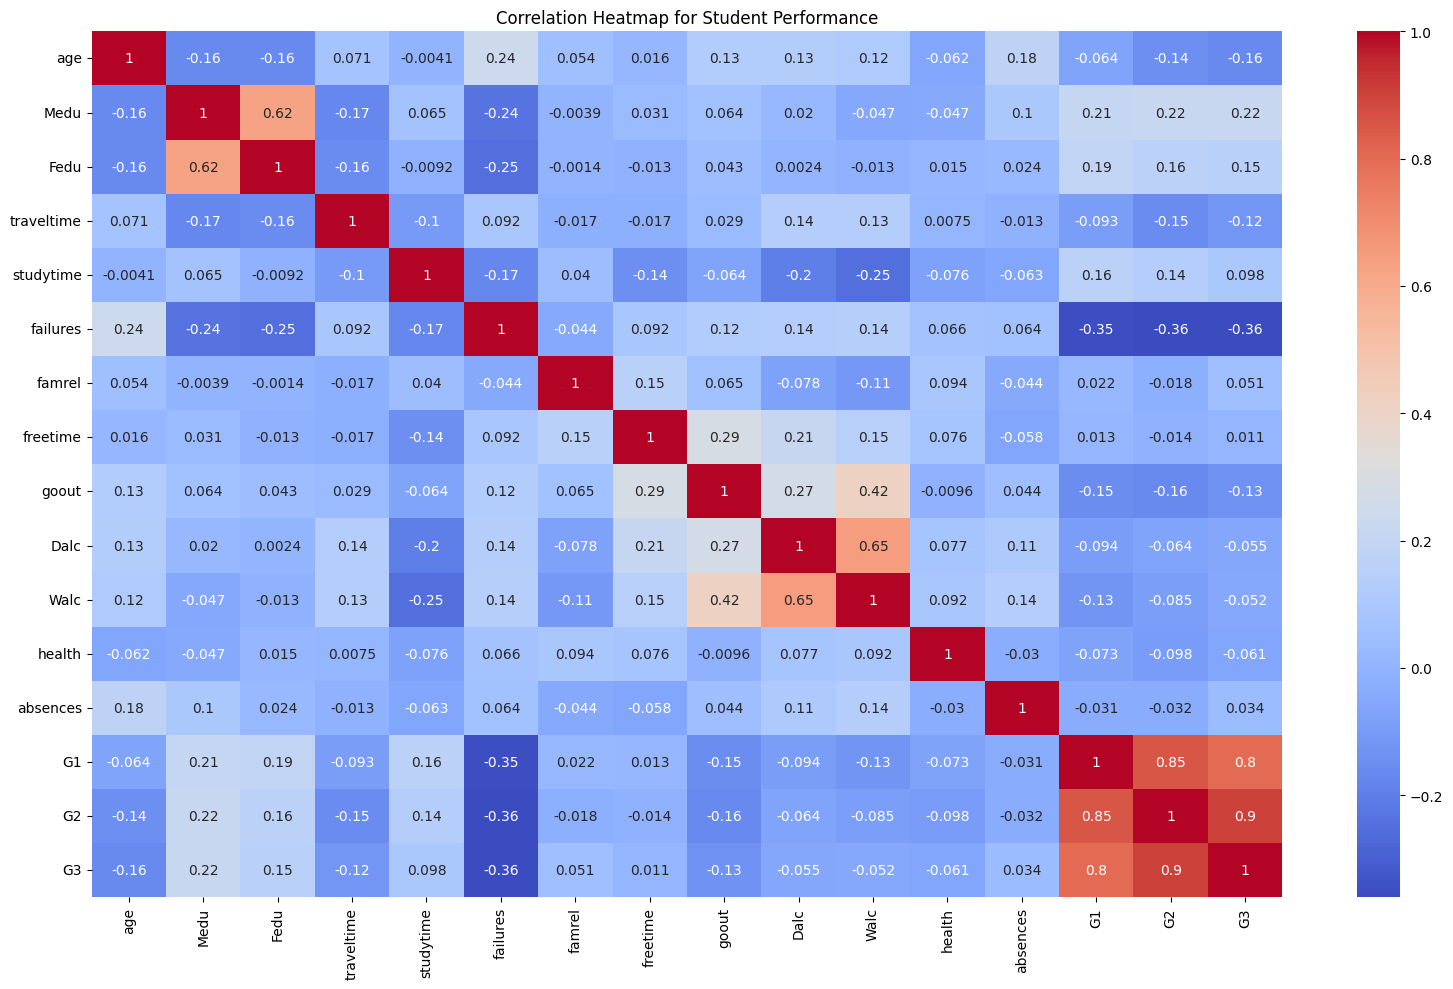

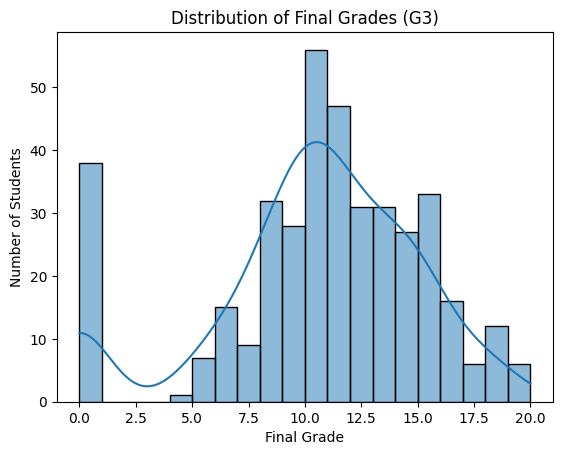

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
print(df.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Student Performance")
plt.tight_layout()
plt.show()

# Distribution of final grade (G3)
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Define features and target
X = df_encoded.drop("G3", axis=1)
y = df_encoded["G3"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ MAE: 1.11
✅ RMSE: 1.87
✅ R² Score: 0.83


In [6]:
import pickle

pickle.dump(model, open("D:/ML PROJECTS/Student Performance Prediction using ML/student_model.pkl", "wb"))


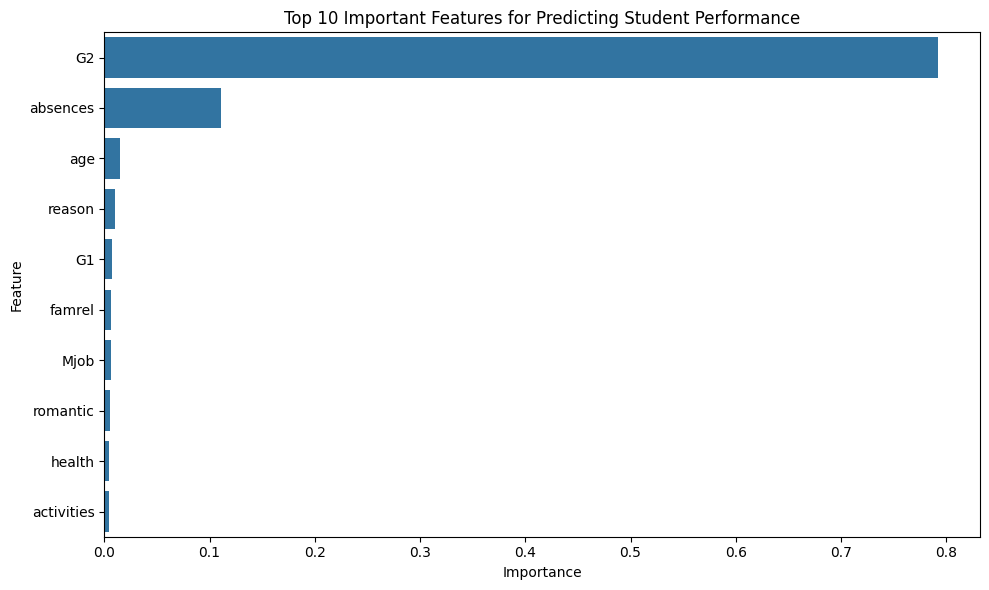

In [7]:
importances = model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({"Feature": feat_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df.head(10))
plt.title("Top 10 Important Features for Predicting Student Performance")
plt.tight_layout()
plt.show()
